In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [2]:
#training from data to find optimal weight vector
def perceptron_classification(training_X,training_y):
    mistake_count=0
    sz=training_X.shape[0]
    w=np.zeros(training_X.shape[1])  #inital guess,weight vector
    for it in range(100):
        i=random.randint(0,sz-1)
        h=np.sign(np.dot(w,training_X[i,:]))
        if h!=training_y[i]:
            w+=np.dot(training_y[i],training_X[i])
            w=w/np.linalg.norm(w)
            mistake_count+=1
            print(w)
                
    return w,mistake_count


In [3]:
#Testing the data
def misclassification_count(testing_X,testing_y,trained_w):
    misClasscount=0
    y_pred=[]
    for i in range(len(testing_X)):
        x=testing_X[i]
        y=testing_y[i]
        h=np.sign(np.dot(trained_w,x))     
        y_pred.append(h)   
        print("Actual:",y," Predicted:",h)
        if h!=y :
            misClasscount +=1
            print("Mis-classified here")
    return y_pred,misClasscount


In [4]:
# generate a binary classification dataset with 2 classes and 5 features
X,y=make_classification(n_samples=100, n_features=5, n_classes=2)
#make classes {-1,1} instead of {0,1}
y=2*y-1 

#normalize the data set  of X with its own norm xi
for i in range(100):
    X[i]=X[i]/(np.linalg.norm(X[i,:])) #preprocessing the data

In [5]:
#split test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [6]:
#call for training
weight_vector,mistakeCount=perceptron_classification(X_train,y_train)
#display results
print("Optimal Weight Vector:",weight_vector)
print("Mistakes Counted by Perceptron Algorithm is ",mistakeCount)

[0.08950262 0.56168635 0.21178147 0.79384222 0.03822122]
[-0.93749227  0.22297646  0.04114482  0.25618235 -0.06377657]
[-0.2772244   0.59908205  0.13991399  0.72863077 -0.11733972]
[-0.91274593  0.06870098  0.15715806  0.27735533  0.24606995]
[-0.14257227  0.24534175  0.36462669  0.72046519  0.51716329]
[-0.47319688  0.56368605  0.10551366  0.64968977 -0.15847025]
[ 0.28167862  0.64526429  0.02746122  0.61554978 -0.35303753]
[0.38782901 0.33955398 0.30425362 0.72191897 0.34720958]
[ 0.10852241  0.65496376  0.07908486  0.69513315 -0.26416062]
[0.452121   0.33577559 0.29152361 0.70105262 0.32616033]
[ 0.1209644   0.66248615 -0.06940426  0.49794155 -0.54195663]
[-0.02101491  0.54498109  0.22886648  0.80234636  0.08009018]
[-0.20881705  0.64151508 -0.10121178  0.43547897 -0.58733984]
[-0.14346632  0.56182242  0.20702544  0.78743236  0.02938914]
[-0.37290996  0.60269342 -0.10925986  0.38966121 -0.57786264]
[-0.18836279  0.57209399  0.19126749  0.77498935 -0.00601561]
[-0.84059457  0.0420606

In [7]:
#call for testing the data set
y_pred,misclassification_count=misclassification_count(X_test,y_test,weight_vector)
print("\nMisclassifications Counted using Test Data is",misclassification_count)

Actual: -1  Predicted: -1.0
Actual: 1  Predicted: 1.0
Actual: -1  Predicted: -1.0
Actual: -1  Predicted: -1.0
Actual: 1  Predicted: 1.0
Actual: 1  Predicted: 1.0
Actual: 1  Predicted: 1.0
Actual: -1  Predicted: -1.0
Actual: -1  Predicted: -1.0
Actual: -1  Predicted: -1.0
Actual: -1  Predicted: -1.0
Actual: -1  Predicted: -1.0
Actual: 1  Predicted: 1.0
Actual: -1  Predicted: -1.0
Actual: 1  Predicted: 1.0
Actual: -1  Predicted: -1.0
Actual: -1  Predicted: -1.0
Actual: -1  Predicted: -1.0
Actual: 1  Predicted: 1.0
Actual: 1  Predicted: 1.0

Misclassifications Counted using Test Data is 0


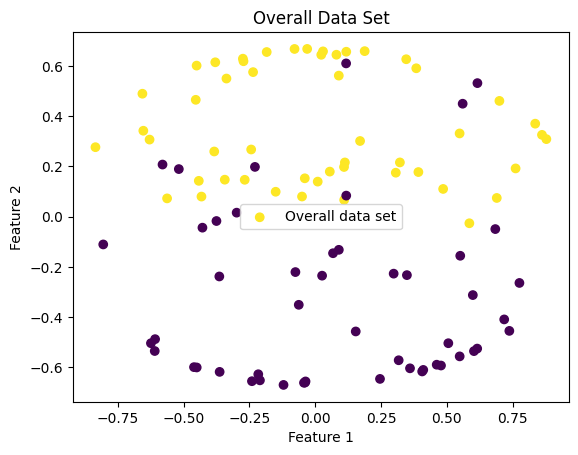

In [8]:
#plottting time
plt.scatter(X[:, 0], X[:, 1], c=y, label="Overall data set")
plt.title("Overall Data Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

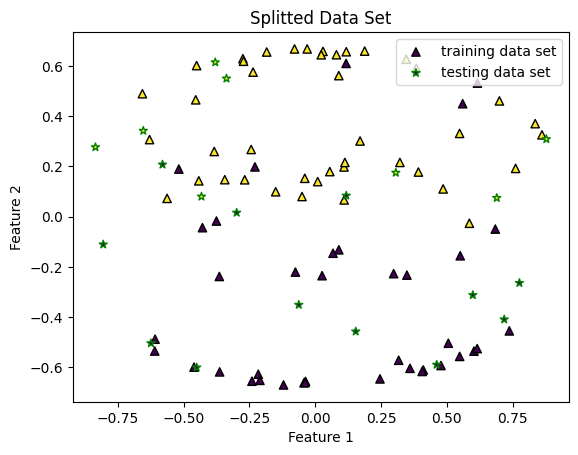

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,marker='^' , edgecolors='black',label="training data set") 
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='*', edgecolors='green',label="testing data set")
plt.title("Splitted Data Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

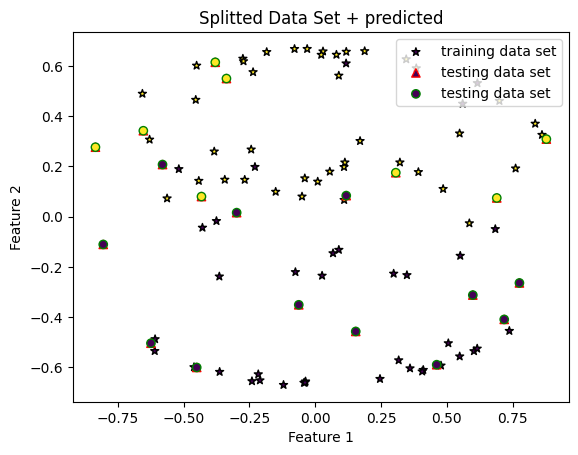

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='*',edgecolors='black',label="training data set") 
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^',edgecolors='red',label="testing data set")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o',edgecolors='green',label="testing data set")
plt.title("Splitted Data Set + predicted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

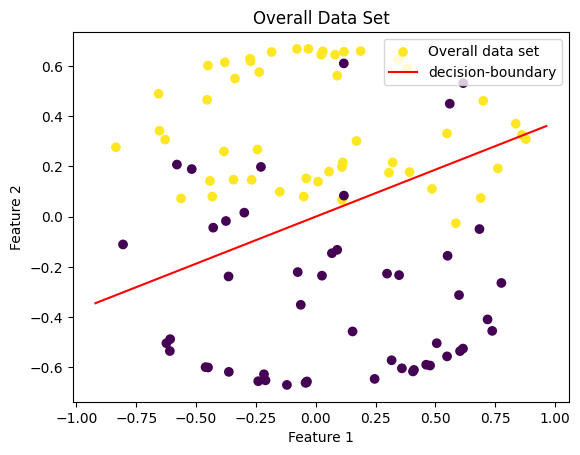

In [12]:
#plottting time
plt.scatter(X[:, 0], X[:, 1], c=y, label="Overall data set")
plt.title("Overall Data Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

xmin,xmax=plt.xlim()
x_range=np.linspace(xmin,xmax,100)
Y_dec_boundary=weight_vector[0]*x_range+weight_vector[1]*x_range
plt.plot(x_range,Y_dec_boundary,color='red',label="decision-boundary")
plt.legend()

plt.show()

Accuracy Score: 100.0 %
Confusion Matrix:
[[12  0]
 [ 0  8]]


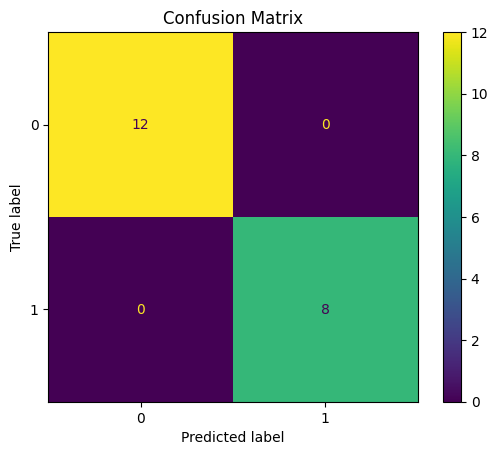

In [14]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy*100,"%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix")
plt.show()